Helicopter Escape

Analysing Data


I began my analysis by scraping the data from an online source(Wikipedia). It is a data that narrate prison escape in different countries by helicopter
Scraping the data

In [69]:
import requests
from bs4 import BeautifulSoup

url = requests.get('https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts')
soup = BeautifulSoup(url.text,'html.parser')
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of helicopter prison escapes - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conten

In [37]:
<table class="wikitable sortable jquery-tablesorter" style="width:100%;">
<thead><tr>

SyntaxError: invalid syntax (347782791.py, line 1)

In [71]:
table = soup.find_all('table')[1]
print(table)

<table class="wikitable sortable" style="width:100%;">
<tbody><tr>
<th style="width:11%;">Date</th>
<th style="width:14%;">Prison name</th>
<th style="width:5%;">Country</th>
<th style="width:5%;">Succeeded</th>
<th class="unsortable" style="width:15%;">Escapee(s)</th>
<th class="unsortable" style="width:55%;">Details
</th></tr>
<tr>
<td><span data-sort-value="1971-07-19 !">August 19, 1971</span>
</td>
<td>Santa Martha Acatitla
</td>
<td><span class="flagicon nowrap"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="560" data-file-width="980" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/40px-Flag_of_Mexico.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/60px-Flag_of_Mexico.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/Mexico" title="Mexico">Mexico</a>
</td>
<td class="table-yes" style="background:#9EFF9E;color:black;

In [73]:
word_titles = table.find_all('th')

In [75]:
word_titles

[<th style="width:11%;">Date</th>,
 <th style="width:14%;">Prison name</th>,
 <th style="width:5%;">Country</th>,
 <th style="width:5%;">Succeeded</th>,
 <th class="unsortable" style="width:15%;">Escapee(s)</th>,
 <th class="unsortable" style="width:55%;">Details
 </th>]

In [79]:
world_table_titles =[title.text.strip() for title in word_titles]
print(world_table_titles)

['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details']


In [81]:
import pandas as pd
df = pd.DataFrame(columns = world_table_titles)
df

,Date,Prison name,Country,Succeeded,Escapee(s),Details


In [83]:
column_data = table.find_all('tr')

In [85]:
for row in column_data[1:]:
    row_data = row.find_all('td')   
    individual_row_data = [data.text.replace('\n', '').strip() for data in row_data]
    length = len(df)
    df.loc[length] = individual_row_data

In [87]:
df

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David KaplanCarlos Antonio Contreras Castro,Kaplan was a New York businessman who had been...
1,"October 31, 1973","Mountjoy Jail, Dublin",Ireland,Yes,JB O'HaganSeamus TwomeyKevin Mallon,An IRA member hijacked a helicopter and forced...
2,"May 24, 1978","United States Penitentiary, Marion, Illinois",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Dupré and Beaum..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Paquet held a sawed-off shotgun against the ba...
5,"January, 1983",Pentridge (HM Prison),Australia,No,David McMillan,"Three suspects, all held on drug-importation c..."
6,"December 19, 1985","Perry Correctional Institution, Pelzer, South ...",United States,Yes,James Rodney LeonardWilliam Douglas BallewJess...,"Leonard, a murderer, Ballew and Smith, who wer..."
7,"December 31, 1985","Cândido Mendes penitentiary, Ilha Grande, Rio ...",Brazil,Yes,"José Carlos dos Reis Encina, a.k.a. ""Escadinha""","Encina, a drug lord, was rescued by José Carlo..."
8,"May 26, 1986",Prison de la Santé,France,Yes,Michel Vaujour,Vaujour had 28 years to serve for attempted mu...
9,"November 5, 1986","Federal Correctional Institution, Dublin, Cali...",United States,Yes,Samantha Lopez,Ronald J. McIntosh walked away from a minimum ...


Removing Duplicates

In [89]:
data = df.drop_duplicates(keep='first')

In [91]:
data = df.drop_duplicates().reset_index(drop=True)

In [93]:
data

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David KaplanCarlos Antonio Contreras Castro,Kaplan was a New York businessman who had been...
1,"October 31, 1973","Mountjoy Jail, Dublin",Ireland,Yes,JB O'HaganSeamus TwomeyKevin Mallon,An IRA member hijacked a helicopter and forced...
2,"May 24, 1978","United States Penitentiary, Marion, Illinois",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Dupré and Beaum..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Paquet held a sawed-off shotgun against the ba...
5,"January, 1983",Pentridge (HM Prison),Australia,No,David McMillan,"Three suspects, all held on drug-importation c..."
6,"December 19, 1985","Perry Correctional Institution, Pelzer, South ...",United States,Yes,James Rodney LeonardWilliam Douglas BallewJess...,"Leonard, a murderer, Ballew and Smith, who wer..."
7,"December 31, 1985","Cândido Mendes penitentiary, Ilha Grande, Rio ...",Brazil,Yes,"José Carlos dos Reis Encina, a.k.a. ""Escadinha""","Encina, a drug lord, was rescued by José Carlo..."
8,"May 26, 1986",Prison de la Santé,France,Yes,Michel Vaujour,Vaujour had 28 years to serve for attempted mu...
9,"November 5, 1986","Federal Correctional Institution, Dublin, Cali...",United States,Yes,Samantha Lopez,Ronald J. McIntosh walked away from a minimum ...


converting the data to a csv file

In [ ]:
data.to_csv(r'C:\Users\user\Desktop\csv\helicopter prison escapage.csv', index = False)

Standardizing the Date column; inserting date with no day i.e with only month and year and assuming a day for them

In [95]:
import pandas as pd

In [97]:
data.loc[data['Date'] == 'January, 1983', 'Date'] = 'January 10, 1983'


In [99]:
data.loc[data['Date'] == 'December 1992','Date'] = 'December 19, 1992'

In [101]:
data.loc[data['Date'] == 'July 2005','Date'] = 'July 5, 2005'

In [105]:
import pandas as pd
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

Converting the Date column datatype from strings to datetime 

In [107]:
data

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David KaplanCarlos Antonio Contreras Castro,Kaplan was a New York businessman who had been...
1,1973-10-31,"Mountjoy Jail, Dublin",Ireland,Yes,JB O'HaganSeamus TwomeyKevin Mallon,An IRA member hijacked a helicopter and forced...
2,1978-05-24,"United States Penitentiary, Marion, Illinois",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Dupré and Beaum..."
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Paquet held a sawed-off shotgun against the ba...
5,1983-01-10,Pentridge (HM Prison),Australia,No,David McMillan,"Three suspects, all held on drug-importation c..."
6,1985-12-19,"Perry Correctional Institution, Pelzer, South ...",United States,Yes,James Rodney LeonardWilliam Douglas BallewJess...,"Leonard, a murderer, Ballew and Smith, who wer..."
7,1985-12-31,"Cândido Mendes penitentiary, Ilha Grande, Rio ...",Brazil,Yes,"José Carlos dos Reis Encina, a.k.a. ""Escadinha""","Encina, a drug lord, was rescued by José Carlo..."
8,1986-05-26,Prison de la Santé,France,Yes,Michel Vaujour,Vaujour had 28 years to serve for attempted mu...
9,1986-11-05,"Federal Correctional Institution, Dublin, Cali...",United States,Yes,Samantha Lopez,Ronald J. McIntosh walked away from a minimum ...


identifying the country with the most prison escape from the year 1971 and 2020

In [221]:
groups = data.groupby(['Country'])
series= groups['Date'].count().sort_values(ascending = True)
series.reset_index()

,Country,Date
0,Chile,1
1,Ireland,1
2,Italy,1
3,Mexico,1
4,Netherlands,1
5,Puerto Rico,1
6,Russia,1
7,Australia,2
8,Brazil,2
9,Colombia,2


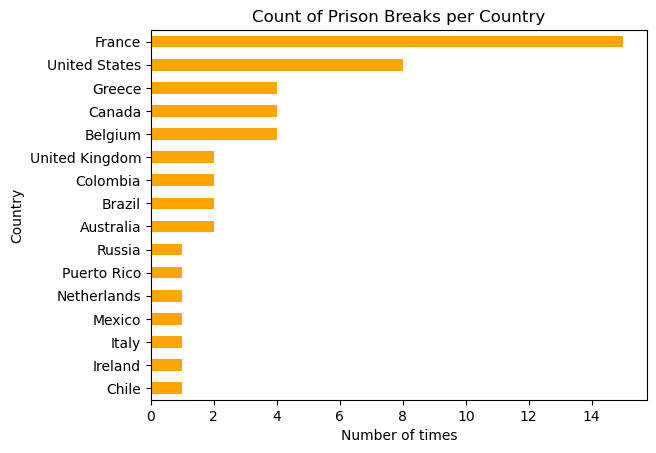

In [231]:
series.plot(kind='barh', color='orange')
plt.title('Count of Prison Breaks per Country')
plt.xlabel('Number of times')
plt.ylabel('Country')
plt.show()

France has the highest prison. This breach may show low level of security by this country
Others including Russia,Chile,ireland,italy, Mexico, Netherlands, Puerto Rico has only one prison escape between the 

Which Year has the most prison break 

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         50 non-null     datetime64[ns]
 1   Prison name  50 non-null     object        
 2   Country      50 non-null     object        
 3   Succeeded    50 non-null     object        
 4   Escapee(s)   50 non-null     object        
 5   Details      50 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.5+ KB


In [115]:
data

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David KaplanCarlos Antonio Contreras Castro,Kaplan was a New York businessman who had been...
1,1973-10-31,"Mountjoy Jail, Dublin",Ireland,Yes,JB O'HaganSeamus TwomeyKevin Mallon,An IRA member hijacked a helicopter and forced...
2,1978-05-24,"United States Penitentiary, Marion, Illinois",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Dupré and Beaum..."
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Paquet held a sawed-off shotgun against the ba...
5,1983-01-10,Pentridge (HM Prison),Australia,No,David McMillan,"Three suspects, all held on drug-importation c..."
6,1985-12-19,"Perry Correctional Institution, Pelzer, South ...",United States,Yes,James Rodney LeonardWilliam Douglas BallewJess...,"Leonard, a murderer, Ballew and Smith, who wer..."
7,1985-12-31,"Cândido Mendes penitentiary, Ilha Grande, Rio ...",Brazil,Yes,"José Carlos dos Reis Encina, a.k.a. ""Escadinha""","Encina, a drug lord, was rescued by José Carlo..."
8,1986-05-26,Prison de la Santé,France,Yes,Michel Vaujour,Vaujour had 28 years to serve for attempted mu...
9,1986-11-05,"Federal Correctional Institution, Dublin, Cali...",United States,Yes,Samantha Lopez,Ronald J. McIntosh walked away from a minimum ...


Extracting the year to a separate column

In [117]:
data['Year'] = data['Date'].dt.year

In [119]:
data

,Date,Prison name,Country,Succeeded,Escapee(s),Details,Year
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David KaplanCarlos Antonio Contreras Castro,Kaplan was a New York businessman who had been...,1971
1,1973-10-31,"Mountjoy Jail, Dublin",Ireland,Yes,JB O'HaganSeamus TwomeyKevin Mallon,An IRA member hijacked a helicopter and forced...,1973
2,1978-05-24,"United States Penitentiary, Marion, Illinois",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...,1978
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Dupré and Beaum...",1981
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Paquet held a sawed-off shotgun against the ba...,1981
5,1983-01-10,Pentridge (HM Prison),Australia,No,David McMillan,"Three suspects, all held on drug-importation c...",1983
6,1985-12-19,"Perry Correctional Institution, Pelzer, South ...",United States,Yes,James Rodney LeonardWilliam Douglas BallewJess...,"Leonard, a murderer, Ballew and Smith, who wer...",1985
7,1985-12-31,"Cândido Mendes penitentiary, Ilha Grande, Rio ...",Brazil,Yes,"José Carlos dos Reis Encina, a.k.a. ""Escadinha""","Encina, a drug lord, was rescued by José Carlo...",1985
8,1986-05-26,Prison de la Santé,France,Yes,Michel Vaujour,Vaujour had 28 years to serve for attempted mu...,1986
9,1986-11-05,"Federal Correctional Institution, Dublin, Cali...",United States,Yes,Samantha Lopez,Ronald J. McIntosh walked away from a minimum ...,1986


The year with the most prison break

In [135]:
year_with_most_break = data['Year'].mode()

In [137]:
year_with_most_break

0    1986
1    1988
2    2001
3    2007
4    2009
Name: Year, dtype: int32

In [159]:
yearcounts = data['Year'].value_counts()

In [169]:
results = pd.DataFrame({'year_with_most_break':year_with_most_break, 'yearcounts':year_with_most_break.map(yearcounts)})

In [171]:
results

,year_with_most_break,yearcounts
0,1986,3
1,1988,3
2,2001,3
3,2007,3
4,2009,3


The year 1986,1988,2001,2007 and 2009 has the highest number of breaks

How many Escape succedded?

In [195]:
count_succedded_per_country = data.groupby('Country')['Succeeded'].apply(lambda x: (x == 'Yes').sum())
print(count_succedded_per_country)

Country
Australia          1
Belgium            2
Brazil             2
Canada             3
Chile              1
Colombia           2
France            11
Greece             2
Ireland            1
Italy              1
Mexico             1
Netherlands        0
Puerto Rico        1
Russia             1
United Kingdom     1
United States      6
Name: Succeeded, dtype: int64


how many are the failed attempt by country

In [197]:
count_failed_per_country = data.groupby('Country')['Succeeded'].apply(lambda x: (x == 'No').sum())
print(count_failed_per_country)

Country
Australia         1
Belgium           2
Brazil            0
Canada            1
Chile             0
Colombia          0
France            4
Greece            2
Ireland           0
Italy             0
Mexico            0
Netherlands       1
Puerto Rico       0
Russia            0
United Kingdom    1
United States     2
Name: Succeeded, dtype: int64


27% of breaks in France failed and 25% failed in the United states. Netherland is the only country the lowest metric of break. The break was not successful